# Example of using PyDDM

## Importing the necessary modules

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays

import sys
usernm = "rmcgorty"
sys.path.append("C:/Users/%s/Documents/GitHub/PyDDM/PyDDM" % usernm) #must point to the PyDDM folder
### If you don't have PyDDM, get it here: https://github.com/rmcgorty/PyDDM
import ddm_analysis_and_fitting as ddm

import pickle #for saving data

## Example data -- 1 micron beads with stage moving at 7 microns/s

### Loading data and analysis parameters

In [2]:
import yaml
ddm_analysis_parameters_str = """
DataDirectory: './'
FileName: '1um_Beads_7ums.tif'
Metadata:
  pixel_size: 0.186 # size of pixel in um
  frame_rate: 45.4 #frames per second
Analysis_parameters:
  starting_frame_number: 0
  number_lag_times: 30
  last_lag_time: 600
  binning: yes
  bin_size: 2
  use_windowing_function: yes
  overlap_method: 1
  number_differences_max: 150
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential'
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.9, 2.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
  Auto_update_good_q_range: True
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)
ddm_calc = ddm.DDM_Analysis(parameters_as_dictionary)

Provided metadata: {'pixel_size': 0.186, 'frame_rate': 45.4}
Image shape: 2000-by-128-by-128
Number of frames to use for analysis: 2000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 30
Using the full frame, dimensions: 128-by-128.
Applying windowing function...
Applying binning...
Dimensions after binning (2000, 64, 64), the new pixel size 0.372


### Calculating the DDM matrix

The file ./1um_Beads_7ums_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-06-13 12:54:37,914 - DDM Calculations - Running dt = 1...
2022-06-13 12:54:39,041 - DDM Calculations - Running dt = 5...
2022-06-13 12:54:40,106 - DDM Calculations - Running dt = 11...
2022-06-13 12:54:41,165 - DDM Calculations - Running dt = 24...
2022-06-13 12:54:42,203 - DDM Calculations - Running dt = 51...
2022-06-13 12:54:43,667 - DDM Calculations - Running dt = 110...
2022-06-13 12:54:44,880 - DDM Calculations - Running dt = 234...
2022-06-13 12:54:45,585 - DDM Calculations - Running dt = 497...


DDM matrix took 8.087400913238525 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.4972 0.526 ... 0.5529 0.5726
    ddm_matrix        (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.132 -0.1375
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 1.0 0.9999 ... -31.62 -1.647
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

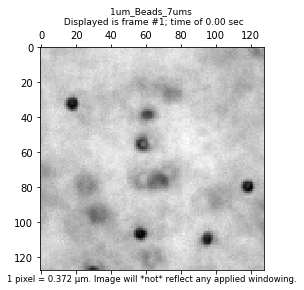

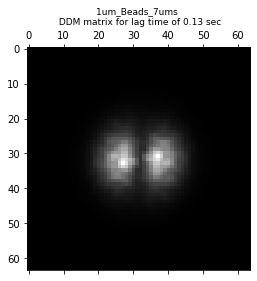

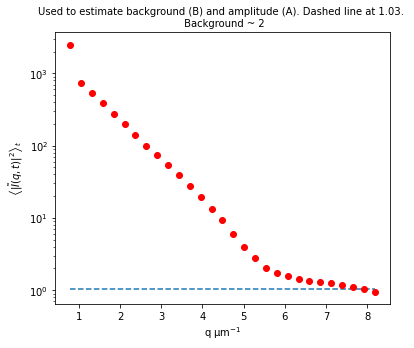

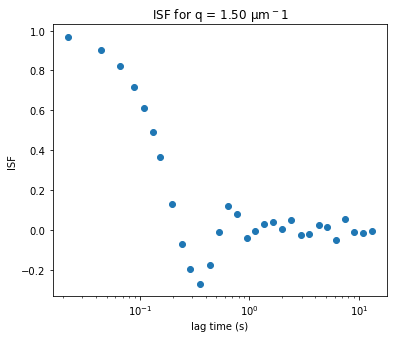

In [3]:
ddm_calc.calculate_DDM_matrix()

### Fitting the DDM matrix

In [4]:
ddm.print_fitting_models()

1: 'DDM Matrix - Single Exponential'
2: 'DDM Matrix - Double Exponential'
3: 'DDM Matrix - Exponential and Ballistic'
4: 'DDM Matrix - Ballistic'
5: 'DDM Matrix - Double Ballistic'
6: 'DDM Matrix - Single Exponential - NonErgodic'
7: 'DDM Matrix - Polydisperse'
8: 'ISF - Single Exponential'
9: 'ISF - Double Exponential'
10: 'ISF - Exponential and Ballistic'
11: 'ISF - Ballistic'
12: 'ISF - Double Ballistic'
13: 'ISF - Single Exponential - NonErgodic'


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.900,2.1


Loading file ./1um_Beads_7ums_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01 - single exponential - first try'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 5.068e+03 3.598e+03 ... 0.9 0.9
    theory           (lagtime, q) float64 2.631e-06 41.94 12.55 ... 2.425 2.299
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      4.470346312139371
    tau_vs_q_slope:                 [-1.1711042]
    msd_alpha:                      [1.70778996]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

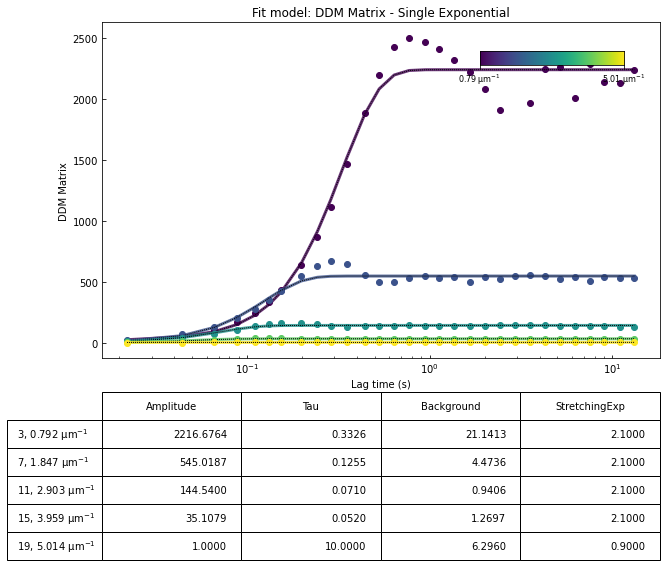

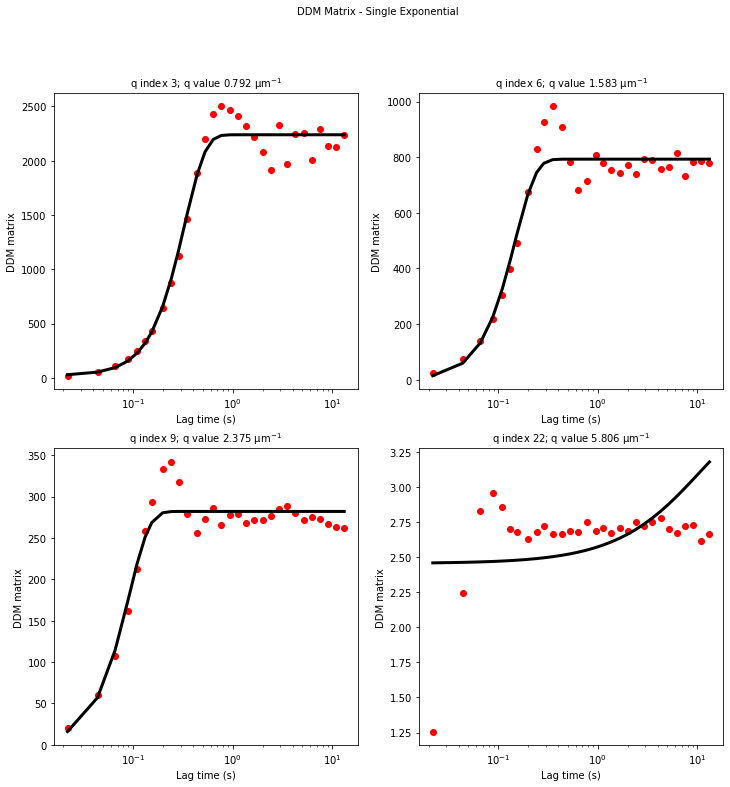

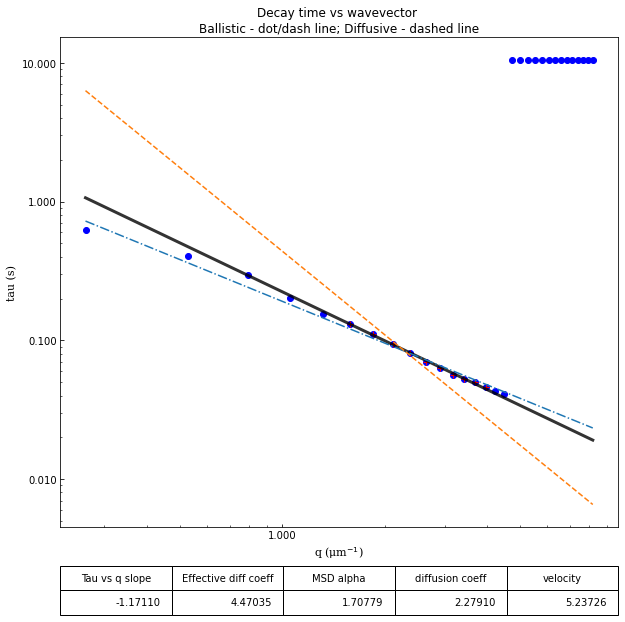

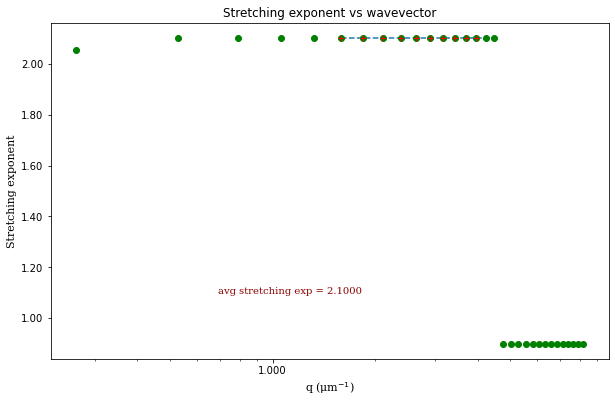

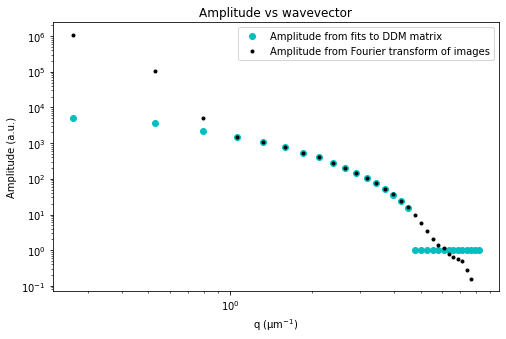

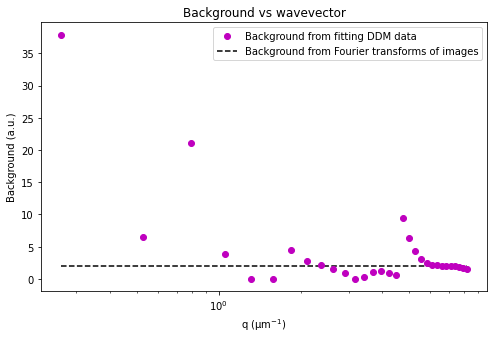

In [5]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit01 = ddm_fit.fit(name_fit = 'fit01 - single exponential - first try', display_table=False)
ddm.fit_report(fit01, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

### Inspecting fits

<IPython.core.display.Javascript object>


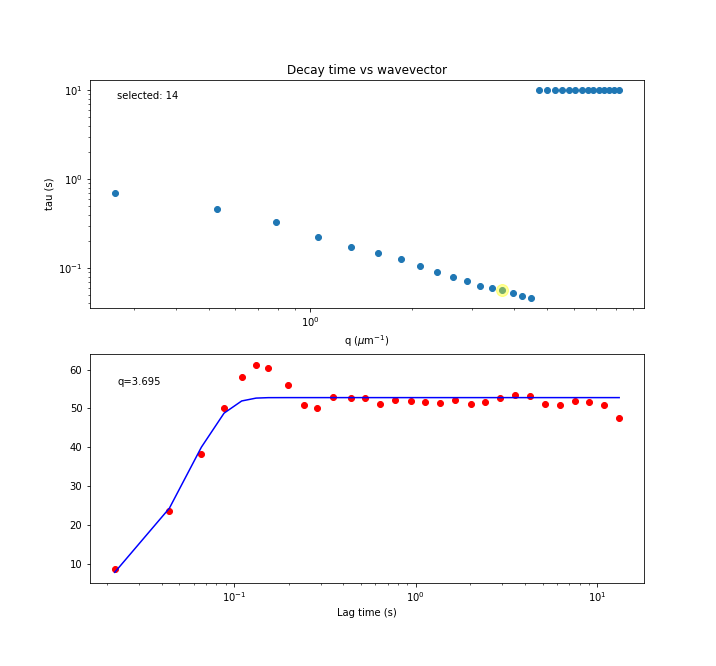

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [6]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit01)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")

In [ ]:
%matplotlib inline

### Trying a different model

In [7]:
ddm_fit.reload_fit_model_by_name("DDM Matrix - Ballistic")

Need to specify SchulzNum.


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Background,25000.0,0.000,10000000.0
Tau,1.0,0.001,10.0
SchulzNum,0.0,0.000,0.0


In [ ]:
ddm_fit.set_parameter_initial_guess("SchulzNum", 1e5)
ddm_fit.set_parameter_bounds("SchulzNum", [1e1,1e9])

In [ ]:
fit02 = ddm_fit.fit(name_fit = 'fit02 - ballistic-type model - second try', display_table=False)
ddm.fit_report(fit02, q_indices=[3,6,9,22], forced_qs=[2,12], use_new_tau=True, show=True)

### Inspecting this fit

In [ ]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit02)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")


In [ ]:
%matplotlib inline

### Showing all fits

In [ ]:
for fit_I_did in ddm_fit.fittings:
    print(fit_I_did)
    display(ddm_fit.fittings[fit_I_did]['fit'])

# Using phiDM to get $v_x(t)$ and $v_y(t)$

In [8]:
dt = 1 #lag time (in frames)
sz = 4 #size of the region of the matrix of phases over which to fit a plane
phiDM = ddm_calc.phiDM(dt, sz, use_gf=True, gfsize=3, err_limit=1e-5)

phiDM.to_netcdf("phiDM_%s_dt%i_size%i.nc" % (ddm_calc.filename_for_saving_data, dt,sz)) #save to disk

<IPython.core.display.Javascript object>


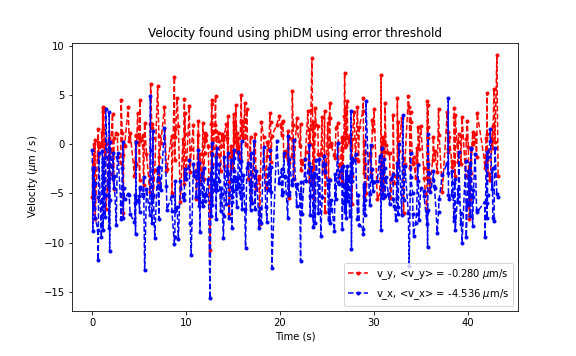

With error threshold, magntiude of v = 4.545
Vx +/- stderr = -4.536 +/- 0.146
Vy +/- stderr = -0.280 +/- 0.144
Vx std deviation = 2.974
Vy std deviation = 2.928
median Vx +/- stderr = -4.568 +/- 0.146
median Vy +/- stderr = -0.171 +/- 0.144


In [9]:
fig,ax = plt.subplots(figsize=(8,8/1.618))

#Locate where the error is less than some limit
w = np.where(phiDM.error < phiDM.err_limit)

ax.plot(phiDM.vtime[w], phiDM.vy[w], '--r.', label='v_y, <v_y> = %.3f $\mu$m/s' % np.mean(phiDM.vy[w]))
ax.plot(phiDM.vtime[w], phiDM.vx[w], '--b.', label='v_x, <v_x> = %.3f $\mu$m/s' % np.mean(phiDM.vx[w]))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity ($\mu$m / s)")
plt.legend(loc=0)
ax.set_title("Velocity found using phiDM using error threshold")
print("With error threshold, magntiude of v = %.3f" % np.sqrt(np.mean(phiDM.vy[w])**2 + np.mean(phiDM.vx[w])**2))
print("Vx +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("Vy +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))
print("Vx std deviation = %.3f" % np.std(phiDM.vx[w]))
print("Vy std deviation = %.3f" % np.std(phiDM.vy[w]))

print("median Vx +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("median Vy +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))


## Can we correct for this drift and just get Brownian motion?

The file ./1um_Beads_7ums_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-06-13 12:58:58,843 - DDM Calculations - Running dt = 1...


Will run DDM computation to correct for velocity...
[6, 0]


2022-06-13 12:58:59,750 - DDM Calculations - Running dt = 5...
2022-06-13 12:59:00,797 - DDM Calculations - Running dt = 11...
2022-06-13 12:59:01,633 - DDM Calculations - Running dt = 24...
2022-06-13 12:59:02,531 - DDM Calculations - Running dt = 51...
2022-06-13 12:59:03,337 - DDM Calculations - Running dt = 110...
2022-06-13 12:59:04,032 - DDM Calculations - Running dt = 234...
2022-06-13 12:59:04,952 - DDM Calculations - Running dt = 497...


DDM matrix took 6.65129542350769 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<IPython.core.display.Javascript object>


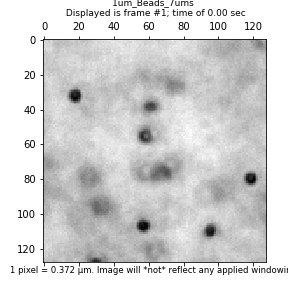

<IPython.core.display.Javascript object>


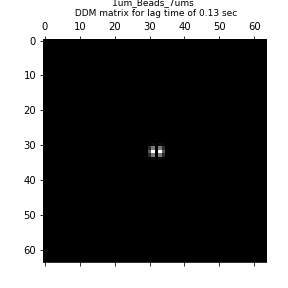

<IPython.core.display.Javascript object>


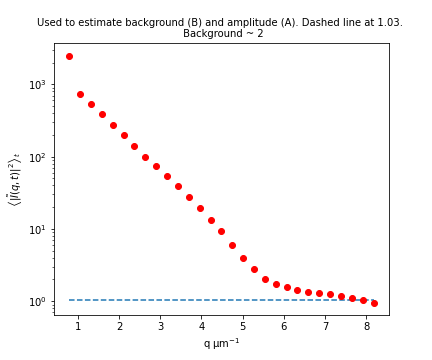

<IPython.core.display.Javascript object>


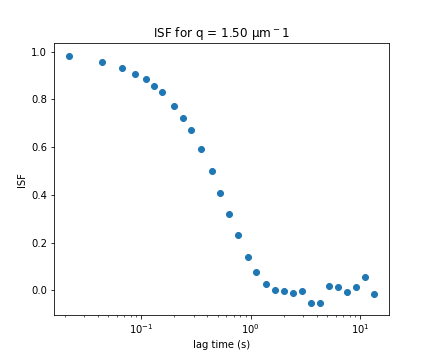

<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.5156 0.5552 ... 0.5854
    ddm_matrix        (lagtime, q) float64 0.0 675.4 191.1 ... 2.051 1.894 1.752
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.128 -0.1232
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 0.9994 0.9981 ... -18.13 -1.095
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

In [10]:
ddm_calc.calculate_DDM_matrix(velocity=[6,0])

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.900,2.1


Loading file ./1um_Beads_7ums_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit03'.


<IPython.core.display.Javascript object>


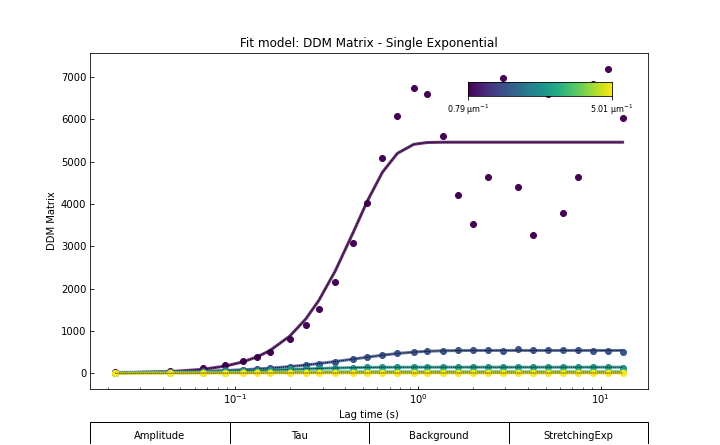

<IPython.core.display.Javascript object>


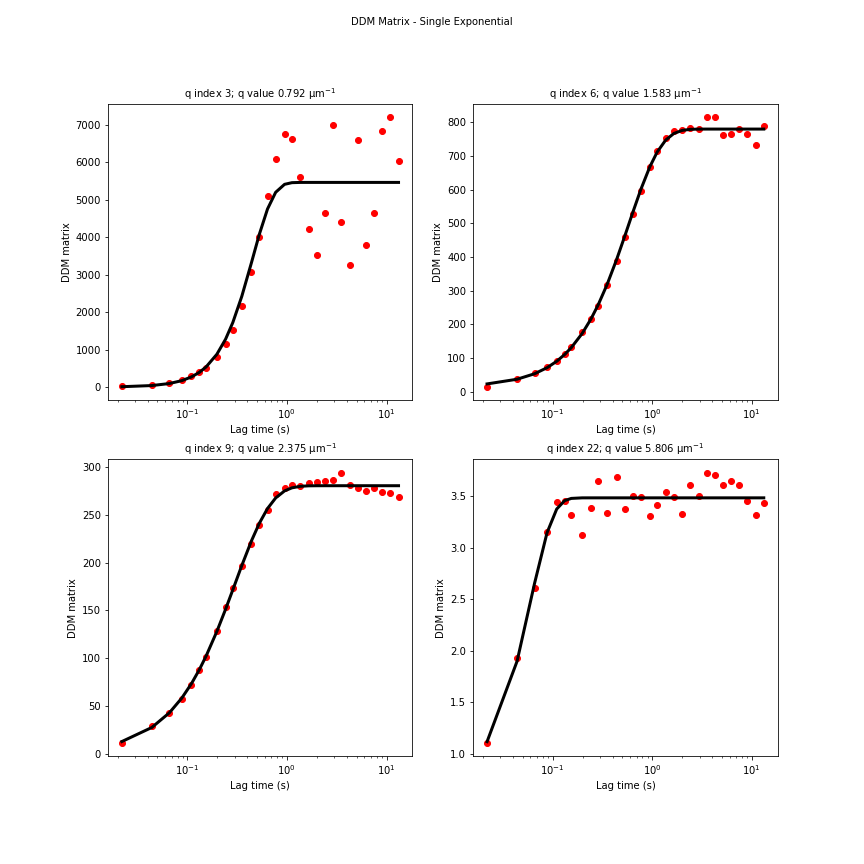

In function 'get_tau_vs_q_fit', using new tau...


<IPython.core.display.Javascript object>


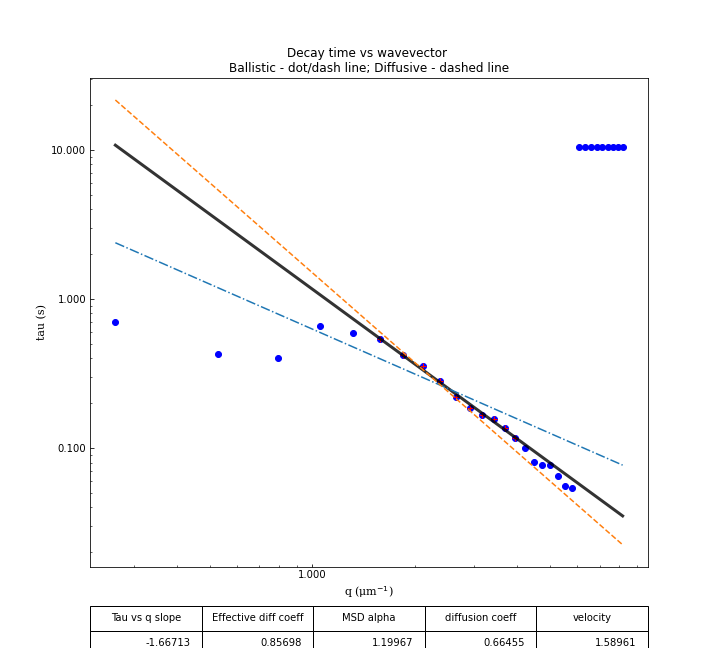

In hf.plot_one_tau_vs_q function, using new tau... 


<IPython.core.display.Javascript object>


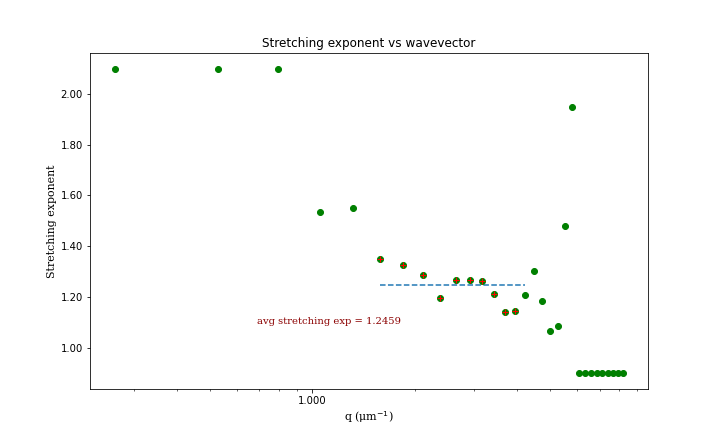

<IPython.core.display.Javascript object>


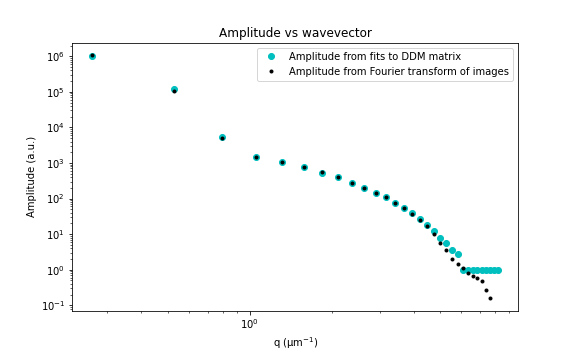

<IPython.core.display.Javascript object>


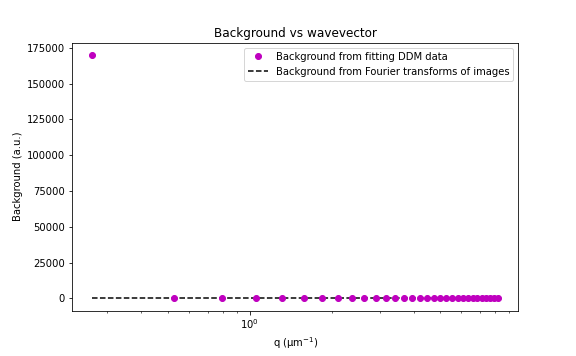

<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 1e+06 1.229e+05 ... 0.9 0.9 0.9
    theory           (lagtime, q) float64 2.631e-06 1.707e+05 ... 2.487 2.371
    isf_data         (lagtime, q) float64 0.0 0.9994 0.9981 ... -18.13 -1.095
    ddm_matrix_data  (lagtime, q) float64 0.0 675.4 191.1 ... 2.051 1.894 1.752
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      0.8569796472668579
    tau_vs_q_slope:                 [-1.66713119]
    msd_alpha:                      [1.19966564]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

In [11]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit03 = ddm_fit.fit(name_fit = 'fit03', display_table=False)
ddm.fit_report(fit03, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

In [ ]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(15,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit03)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")

fig2, (ax, ax2) = plt.subplots(2, 1, figsize=(15,10/1.618))
browser2 = ddm.Browse_DDM_Fits(fig2, ax, ax2, fit02)

fig2.canvas.mpl_connect('pick_event', browser2.on_pick)
fig2.canvas.mpl_connect('key_press_event', browser2.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")

In [ ]:
%matplotlib inline

## Another approach to dealing with anisotropic dynamics

In [ ]:
ddm_calc.calculate_DDM_matrix()

In [ ]:
centralAngle = 90 #100 or 10
angRange = 45
mask = ddm.ddm.generate_mask(np.empty((64,64)), centralAngle, angRange)

plt.figure(figsize=(4,4))
plt.matshow(mask, fignum=0, cmap='gray')
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)

plt.figure(figsize=(4,4))
timelag = 5
log_of_ddm_mat = np.log(ddm_calc.ddm_dataset.ddm_matrix_full[timelag])
plt.matshow(log_of_ddm_mat, cmap=matplotlib.cm.Spectral_r, fignum=0, vmin=-0.7, vmax=6.8)
plt.title("DDM Matrix for $\Delta$t = %.3f s" % ddm_calc.ddm_dataset.lagtime[timelag])
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)

plt.figure(figsize=(4,4))
timelag = 5
log_of_ddm_mat = np.log(ddm_calc.ddm_dataset.ddm_matrix_full[timelag])
plt.matshow(mask*log_of_ddm_mat, cmap=matplotlib.cm.Spectral_r, fignum=0, vmin=-0.7, vmax=6.8)
plt.title("DDM Matrix for $\Delta$t = %.3f s" % ddm_calc.ddm_dataset.lagtime[timelag])
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)


In [ ]:
ddm_fit.reload_fit_model_by_name("DDM Matrix - Single Exponential")
ddm_fit.set_parameter_initial_guess("StretchingExp", 2)
ddm_fit.set_parameter_bounds("StretchingExp", [1,2.1])
ddm_fit.set_parameter_initial_guess("Background", 0.5)
ddm_fit.set_parameter_bounds("Background", [0,100])
ddm_fit.set_parameter_initial_guess("Amplitude", 5)
ddm_fit.set_parameter_initial_guess("Tau", 0.05)

new_radav_pvdir = ddm.ddm.radial_avg_ddm_matrix(ddm_calc.ddm_dataset.ddm_matrix_full, 
                                          centralAngle=centralAngle, angRange=angRange)
ddm_fit.ddm_dataset['ddm_matrix'] = (['time','q'], new_radav_pvdir)

fit05 = ddm_fit.fit(name_fit = 'fit05', display_table=False)
ddm.fit_report(fit05, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)